# 利用线性回归预测风电和光伏电站发电量

利用线性回归算法，基于已有的气象数据来预测德国2016年风电和光伏电站的发电量 

这里，我用到的是[Open Power System Data](https://open-power-system-data.org/)开放的数据库

平台的数据基本包括了所有欧洲城市，但是我发现德国的数据是最全面的。  
因此，我尝试用2016年的气象数据和发电数据来进行训练，并预测2017年的数据，观察预测的准确性 
项目中运用的数据集主要是两个：
* Time series with load, wind and solar, prices in hourly resolution. 
* Weather data with wind speed, radiation, temperature and other measurements. 

## 1. 导入数据

In [1]:
# 首先导入基本的分析模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1.1. 发电量数据导入

In [2]:
production = pd.read_csv(r"E:\Jupyter\wind_solar_data\time_series_60min_singleindex_filtered.csv",
                         parse_dates=[0], index_col=0)

In [3]:
production.head(3)

,cet_cest_timestamp,interpolated_values,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01T01:00:00+0100,NaN,41913.0,39396,22.39,39021.0,0.0,0.0,44325.0,8579.0,...,0.0,5615.0,4740.0,2263.0,3352.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 01:00:00,2016-01-01T02:00:00+0100,NaN,40331.0,37718,20.59,39021.0,0.0,0.0,44325.0,8542.0,...,0.0,5498.0,4735.0,2218.0,3280.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 02:00:00,2016-01-01T03:00:00+0100,NaN,39162.0,36692,16.81,39021.0,0.0,0.0,44325.0,8443.0,...,0.0,5439.0,4795.0,2005.0,3434.0,0.0,0.0,17.0,0.0,17.0


In [4]:
production.tail(3)

,cet_cest_timestamp,interpolated_values,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-31 21:00:00,2018-05-31T23:00:00+0200,NaN,NaN,48462,43.05,NaN,NaN,NaN,NaN,NaN,...,0.0,4098.0,4241.0,1312.0,2786.0,0.0,0.0,516.0,208.0,516.0
2018-05-31 22:00:00,2018-06-01T00:00:00+0200,NaN,NaN,45898,42.34,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31 23:00:00,2018-06-01T01:00:00+0200,NaN,NaN,43610,38.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


显然数据包含了2016年到2018年5月底的所有发电数据。我们先分析一下2016年的数据

In [5]:
production_2016 = production.loc[production.index.year == 2016, :].drop('interpolated_values',axis=1)

In [6]:
production_2016.head(3)

,cet_cest_timestamp,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01T01:00:00+0100,41913.0,39396,22.39,39021.0,0.0,0.0,44325.0,8579.0,0.1936,...,0.0,5615.0,4740.0,2263.0,3352.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 01:00:00,2016-01-01T02:00:00+0100,40331.0,37718,20.59,39021.0,0.0,0.0,44325.0,8542.0,0.1928,...,0.0,5498.0,4735.0,2218.0,3280.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 02:00:00,2016-01-01T03:00:00+0100,39162.0,36692,16.81,39021.0,0.0,0.0,44325.0,8443.0,0.1905,...,0.0,5439.0,4795.0,2005.0,3434.0,0.0,0.0,17.0,0.0,17.0


In [7]:
production_2016.tail(3)

,cet_cest_timestamp,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 21:00:00,2016-12-31T22:00:00+0100,50383.0,47205,33.71,40293.0,0.0,0.0,49569.0,14848.0,0.2995,...,0.0,8741.0,9438.0,2974.0,5766.0,0.0,0.0,38.0,58.0,38.0
2016-12-31 22:00:00,2016-12-31T23:00:00+0100,48988.0,45548,27.95,40293.0,0.0,0.0,49569.0,15056.0,0.3037,...,0.0,8750.0,9444.0,2976.0,5774.0,0.0,0.0,54.0,68.0,54.0
2016-12-31 23:00:00,2017-01-01T00:00:00+0100,47641.0,44512,20.96,40294.0,0.0,0.0,49569.0,15422.0,0.3111,...,0.0,8792.0,9543.0,2971.0,5821.0,0.0,0.0,70.0,44.0,70.0


In [8]:
production_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 41 columns):
cet_cest_timestamp                              8784 non-null object
DE_load_entsoe_power_statistics                 8784 non-null float64
DE_load_entsoe_transparency                     8784 non-null int64
DE_price_day_ahead                              8784 non-null float64
DE_solar_capacity                               8784 non-null float64
DE_solar_generation_actual                      8784 non-null float64
DE_solar_profile                                8784 non-null float64
DE_wind_capacity                                8784 non-null float64
DE_wind_generation_actual                       8784 non-null float64
DE_wind_profile                                 8784 non-null float64
DE_wind_offshore_capacity                       8784 non-null float64
DE_wind_offshore_generation_actual              8784 non-null float64
DE_wind_offshore_pro

8784个数据，正好是2016年的小时数  
各个参数的定义可以参照[网站定义](https://data.open-power-system-data.org/time_series/)

显然数据完整，无需进行预处理，另外都是数值型数据，大大简化了特征工程的工作量

## 2.分析数据随时间变化规律

### 2.1分析发电量规律

绘制发电量关于时间的规律曲线，发现是否存在明显规律

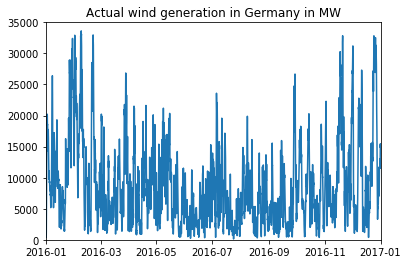

In [9]:
# create plot
plt.plot(production_2016.index, production_2016['DE_wind_generation_actual'])
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)

# save plot
plt.savefig("figs/wind.png", dpi=200)

同样位于北半球，可以推断德国冬季时的风速明显大于夏季，因此发电量也显著大于夏季

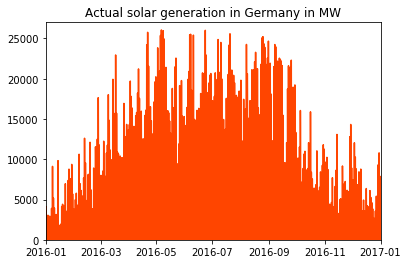

In [10]:
# create plot
plt.plot(production_2016.index, production_2016['DE_solar_generation_actual'], c='OrangeRed')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 27000)

# save plot
plt.savefig("figs/solar.png", dpi=200)

光伏的发电趋势与风电恰好相反，由于夏季能获得更多的辐照度，因此夏季的发电量显著提升

In [11]:
production_wind_solar = production_2016[['DE_wind_generation_actual', 'DE_solar_generation_actual']]

### 2.2. 气象数据

#### 读取数据

获得发电量数据后，我把德国2016年的[气象数据](https://data.open-power-system-data.org/weather_data/)也导入进来

气象数据中包含的信息如下(偷懒不翻译了^_^)：

* wind
    - v1: velocity [m/s] @ height h1 (2 meters above displacement height)
    - v2: velocity [m/s] @ height h2 (10 meters above displacement height)
    - v_50m: velocity [m/s] @ 50 meters above ground
    - h1: height above ground [m] (h1 = displacement height +2m)
    - h2: height above ground [m] (h2 = displacement height +10m)
    - z0: roughness length [m]
* solar parameters:
    - SWTDN: total top-of-the-atmosphere horizontal radiation [W/m²]
    - SWGDN: total ground horizontal radiation [W/m²]
* temperature data
    - T: Temperature [K] @ 2 meters above displacement height (see h1)
* air data
    - Rho: air density [kg/m³] @ surface
    - p: air pressure [Pa] @ surface

In [12]:
#导入气象数据，解析第一行时间列，并将其定为索引
weather = pd.read_csv(r"E:\Jupyter\wind_solar_data\weather_data_GER_2016.csv",
                     parse_dates=[0], index_col=0)

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 14 columns):
cumulated hours    int64
lat                float64
lon                float64
v1                 float64
v2                 float64
v_50m              float64
h1                 int64
h2                 int64
z0                 float64
SWTDN              float64
SWGDN              float64
T                  float64
rho                float64
p                  float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [14]:
weather.tail(3)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-12-31 21:00:00,8781,55.0,15.0,10.49,12.65,14.38,2,10,0.001014,0.0,0.0,278.634644,1.270996,101653.398438
2016-12-31 22:00:00,8782,55.0,15.0,10.47,12.63,14.41,2,10,0.001009,0.0,0.0,278.678162,1.270252,101609.484375
2016-12-31 23:00:00,8783,55.0,15.0,10.39,12.53,14.33,2,10,0.000993,0.0,0.0,278.720184,1.269202,101545.859375


这里要说明一点，由于excel中只能显示1048576个数据，  
但本数据集有2248704个数据，在excel中没有显示完整，  
但是，显然并不影响这里的导入和读取

In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 14 columns):
cumulated hours    int64
lat                float64
lon                float64
v1                 float64
v2                 float64
v_50m              float64
h1                 int64
h2                 int64
z0                 float64
SWTDN              float64
SWGDN              float64
T                  float64
rho                float64
p                  float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


从数据的结构可以看到，
数据以经纬度定位，以h进行延续  
并以经纬度以0.5º x 0.625º的梯度进行变更  
记录每个经纬度每h的气象数据
比如，2016-01-01 00:00:00的数据如下：

In [16]:
weather.loc[weather.index == '2016-01-01 00:00:00', :]

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
2016-01-01,0,47.5,8.750,0.76,1.49,2.37,2,10,0.051061,0.0,0.0,275.898987,1.201012,95842.710938
2016-01-01,0,47.5,9.375,0.75,1.27,1.83,2,10,0.082921,0.0,0.0,275.578674,1.181908,94178.710938
2016-01-01,0,47.5,10.000,0.88,1.59,2.32,4,12,0.398931,0.0,0.0,274.123596,1.146264,90998.710938
2016-01-01,0,47.5,10.625,0.81,1.38,1.93,6,14,0.813970,0.0,0.0,273.670471,1.117516,88518.710938


显然，一个小时有256个数据，计算一下正好与发电量的8784对应

In [17]:
2248704/256

8784.0

按照小时平均一下气象数据

In [18]:
weather_by_day = weather.groupby(weather.index).mean()

In [19]:
weather_by_day.head(5)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


In [20]:
weather_by_day.tail(5)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-12-31 19:00:00,8779.0,51.25,10.3125,3.684609,5.233516,7.098086,2.550781,10.550781,0.164608,0.0,0.0,272.140240,1.268835,99528.062500
2016-12-31 20:00:00,8780.0,51.25,10.3125,3.762305,5.307539,7.083867,2.550781,10.550781,0.164577,0.0,0.0,271.980562,1.269241,99470.789062
2016-12-31 21:00:00,8781.0,51.25,10.3125,3.792852,5.340195,7.122773,2.546875,10.546875,0.164536,0.0,0.0,271.809519,1.269414,99416.492188
2016-12-31 22:00:00,8782.0,51.25,10.3125,3.849961,5.420781,7.221172,2.546875,10.546875,0.164504,0.0,0.0,271.650418,1.269354,99358.375000
2016-12-31 23:00:00,8783.0,51.25,10.3125,3.875156,5.460664,7.283984,2.546875,10.546875,0.164468,0.0,0.0,271.494335,1.269060,99284.750000


### 2.3分析气象数据随时间变化规律

绘制与天气相关的数据规律，以便更好了解数据特性

(0, 12)

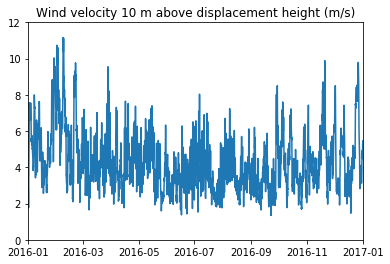

In [21]:
# 绘制地上10m位置风速随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)

(0, 1000)

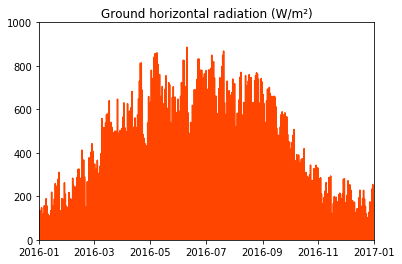

In [22]:
# 绘制大地水平辐照度随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)

显然，辐照度与光伏发电量存在相关关系

(263, 303)

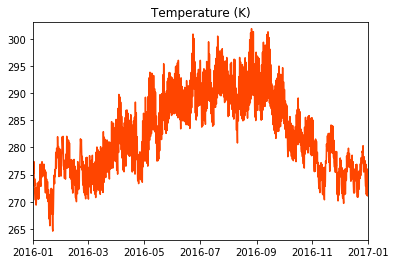

In [23]:
# 温度随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['T'], c='OrangeRed')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(263, 303)

把开尔文温度转化成摄氏度

In [24]:
weather_by_day['T (C)'] = weather_by_day['T'] - 273.15

(-10, 30)

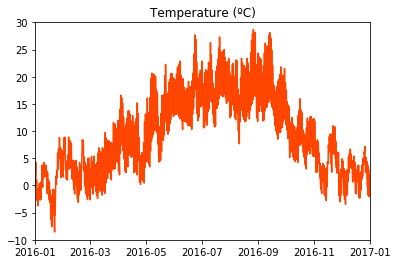

In [25]:
# 摄氏度气温随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['T (C)'], c='OrangeRed')
plt.title('Temperature (ºC)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(-10, 30)

德国的夏季最高气温没有高于30℃，  
光伏发电的最佳温度一般在20度左右，  
显然温度没有过高（37+），可以认为气温没有对光伏发电产生不良影响

(735964.0, 736330.0)

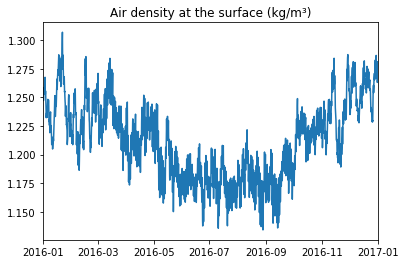

In [26]:
# 地表空气密度随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['rho'])
plt.title('Air density at the surface (kg/m³)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

显然，与风电发电量存在较高的相关性

(735964.0, 736330.0)

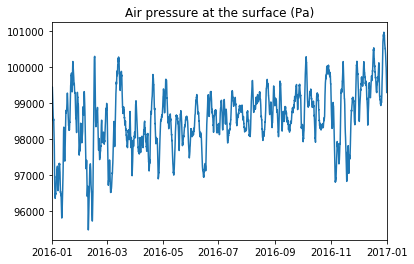

In [27]:
# 大地表面气压随日期变化曲线
plt.plot(weather_by_day.index, weather_by_day['p'])
plt.title('Air pressure at the surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

## 3. 分析气象数据与发电量关系

基于上述图表可见，风电和光伏发电量与气象数据存在正相关关系  
而且基于风电和光伏的背景知识，我们也知道发电量确实与辐照度，风速，气温等变量有关  

为了便于数据建模分析，先把production_wind_solar和weather_by_day数据整合起来  

### 3.1数据整合

In [28]:
# 整合数据
combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)

# 删除多余的温度‘T’数据
combined = combined.drop('T', axis=1)

In [29]:
combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,rho,p,T (C)
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,1.253185,99281.007812,2.146747
2016-01-01 01:00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,1.253778,99288.492188,2.105473
2016-01-01 02:00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,1.254304,99296.398438,2.067089
2016-01-01 03:00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,1.254562,99306.695312,2.061715
2016-01-01 04:00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,1.254733,99319.750000,2.043369


In [30]:
combined.tail()

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,rho,p,T (C)
utc_timestamp,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,15303.0,0.0,8779.0,51.25,10.3125,3.684609,5.233516,7.098086,2.550781,10.550781,0.164608,0.0,0.0,1.268835,99528.062500,-1.009760
2016-12-31 20:00:00,15354.0,0.0,8780.0,51.25,10.3125,3.762305,5.307539,7.083867,2.550781,10.550781,0.164577,0.0,0.0,1.269241,99470.789062,-1.169438
2016-12-31 21:00:00,14848.0,0.0,8781.0,51.25,10.3125,3.792852,5.340195,7.122773,2.546875,10.546875,0.164536,0.0,0.0,1.269414,99416.492188,-1.340481
2016-12-31 22:00:00,15056.0,0.0,8782.0,51.25,10.3125,3.849961,5.420781,7.221172,2.546875,10.546875,0.164504,0.0,0.0,1.269354,99358.375000,-1.499582
2016-12-31 23:00:00,15422.0,0.0,8783.0,51.25,10.3125,3.875156,5.460664,7.283984,2.546875,10.546875,0.164468,0.0,0.0,1.269060,99284.750000,-1.655665


为了进一步分析相关性，绘制气象数据与发电量的关系曲线

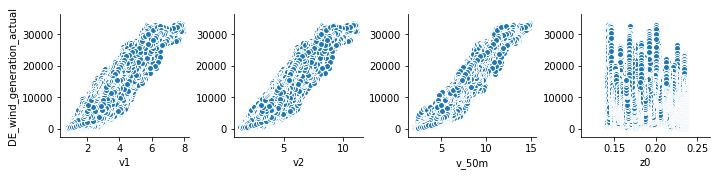

In [31]:
#分析地面以上2m（V1），10m（v2），50m（v_50m）风速，及粗糙度（z0）与风电发电量的关系
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'])

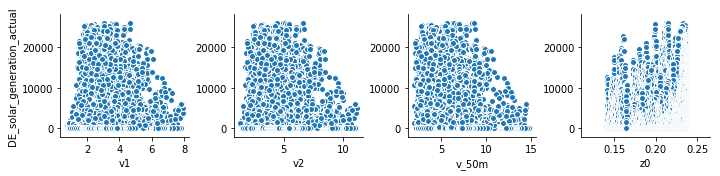

In [32]:
#分析地面以上2m（V1），10m（v2），50m（v_50m）风速，及粗糙度（z0）与光伏发电量的关系
#虽然我知道其实没啥关系-_-||
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])

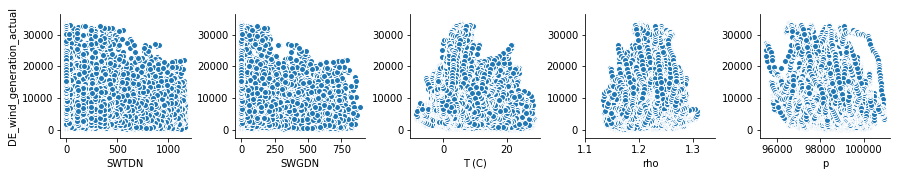

In [33]:
#分析大气辐照度（SWTDN）、地表水平辐照度（SWGDN）、气温（T），空气密度（Rho）,气压（P）与风电发电量的关系
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T (C)', 'rho', 'p'], y_vars=['DE_wind_generation_actual'])

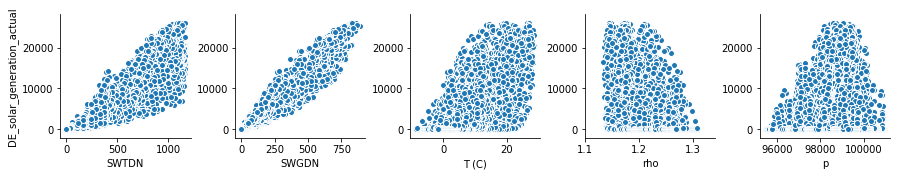

In [34]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T (C)', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])

### 3.2风电

显然，风电发电量与不同高度风速存在相关性关系

In [35]:
#查看各特征间的相关性
combined[['v1','v2','v_50m','z0','DE_wind_generation_actual']].corr()

,v1,v2,v_50m,z0,DE_wind_generation_actual
v1,1.000000,0.991921,0.900250,-0.376931,0.877302
v2,0.991921,1.000000,0.945423,-0.385633,0.913122
v_50m,0.900250,0.945423,1.000000,-0.400718,0.950287
z0,-0.376931,-0.385633,-0.400718,1.000000,-0.351173
DE_wind_generation_actual,0.877302,0.913122,0.950287,-0.351173,1.000000


可见，风电发电量与粗糙度的相关性并不显著。后期建模时，忽略这一变量

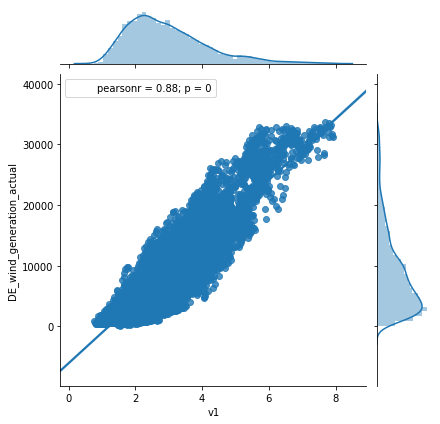

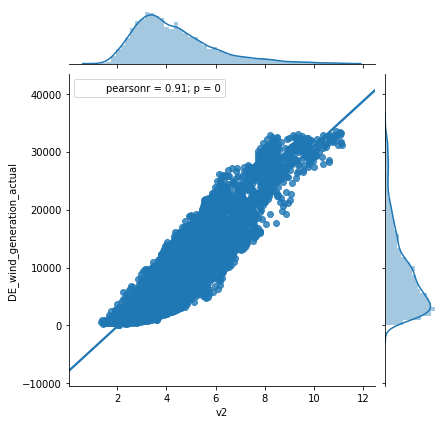

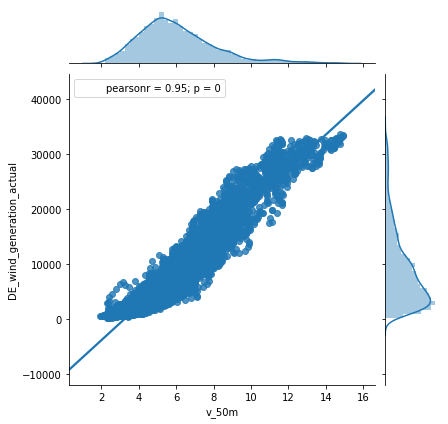

In [36]:
#绘制关系曲线
sns.jointplot(x='v1', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v2', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v_50m', y='DE_wind_generation_actual', data=combined, kind='reg')

### 3.3光伏

同样，光伏发电量与辐照度等参数存在相关性关系

In [37]:
#查看相关性系数
combined[['SWTDN','SWGDN','T (C)','rho','p','DE_solar_generation_actual']].corr()

,SWTDN,SWGDN,T (C),rho,p,DE_solar_generation_actual
SWTDN,1.000000,0.966962,0.539803,-0.408026,-0.034444,0.930727
SWGDN,0.966962,1.000000,0.559515,-0.412105,0.027139,0.977246
T (C),0.539803,0.559515,1.000000,-0.940913,0.010065,0.549273
rho,-0.408026,-0.412105,-0.940913,1.000000,0.292578,-0.402308
p,-0.034444,0.027139,0.010065,0.292578,1.000000,0.038270
DE_solar_generation_actual,0.930727,0.977246,0.549273,-0.402308,0.038270,1.000000


可见，温度与光伏发电量之间的相关性并不显著，后期建模的过程中可以忽略这一变量

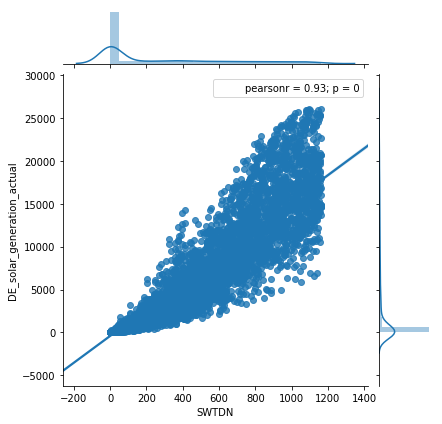

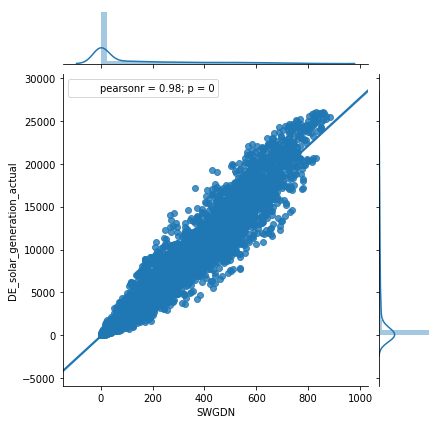

In [38]:
#绘制关系曲线
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=combined, kind='reg')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=combined, kind='reg')

## 4. 线性回归分析

基于上述的分析结果，我尝试基于气象数据预测风电和光伏电站的发电量数据

In [39]:
# 导入必要的模块
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

In [40]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz #导入相关函数，可视化决策树。

## 4.1. 风电发电量

根据以上的分析，我通过构建一个包含特征v1, v2 and v_50m的特征矩阵`X_mind`  
来预测实际的风电发电量`y_wind`

In [41]:
X_wind = combined[['v1', 'v2', 'v_50m']]
y_wind = combined['DE_wind_generation_actual']

In [42]:
y_wind.shape

(8784,)

划分成10个子集进行交叉验证结果的准确性

In [43]:
scores_wind = cross_val_score(lr, X_wind, y_wind, cv=10)
print(scores_wind, "\naverage =", np.mean(scores_wind))

[ 0.8857037   0.91521814  0.90024572  0.87264177  0.69731837  0.88850228
  0.84453678  0.89976353  0.88791477  0.85733849] 
average = 0.86491835563


可以看到，分成10次交叉验证子集后，得到的平均相关性系数为0.86.
看起来还不错，后面基于17,18年的风速速度，可以推测当年的发电量

## 4.2. 光伏发电量

光伏电站发电量的预测与风电类似  
首先，构建一个包含特征'SWTDN', 'SWGDN'的特征矩阵`X_mind`  
随后，划分10个子集对模型结果进行交叉验证  
来预测实际的光伏发电量`y_wind`

In [44]:
X_solar = combined[['SWTDN', 'SWGDN', 'T (C)']]
y_solar = combined['DE_solar_generation_actual']

In [45]:
scores_solar = cross_val_score(lr, X_solar, y_solar, cv=10)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[ 0.78930156  0.91135427  0.93128087  0.95952098  0.96316984  0.96286844
  0.96427485  0.93609908  0.90082358  0.84622618] 
average = 0.916491965108


光伏发电的平均相关性系数为0.916，明显高于风电的发电量

由于没有获得17,18年的气象数据，所以没有对发电量预测。  
细思一下，这种模型的意义主要在于：  
1.基于未来一段时间的气象预报获得发电量数据；  
2.基于以往几年的发电量数据与气象数据，预测未来几年的发电量与投资回收期；  
3.对比当年的预测发电量与实际发电量，以偏差复核电站的运营过程是否出现较大故障；  
4.复核当前电站的Pr值是否与EPC方质Guarantee agreement中的相符，如不符可追究责任等等  